# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 50 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups.',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '10 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'mtl_approach': MTLApproach.HAND_2,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 50,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 77061
Process ID: 105481
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 50 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups.',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '10 epochs',
                         'handcrafted_2']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7fb865

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
(None, 1024)
(1024,)
KerasTensor(type_spec=TensorSpec(shape=(1,), dtype=tf.int32, name=None), inferred_value=[1024], name='tf.compat.v1.shape/Shape:0', description="created by layer 'tf.compat.v1.shape'")
KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.int32, name=None), inferred_value=[None], name='tf.__operators__.getitem_2/strided_slice:0', description="created by layer 'tf.__operators__.getitem_2'")
Model created


# Vizualize Model

-------------------- vizualize model -------------------


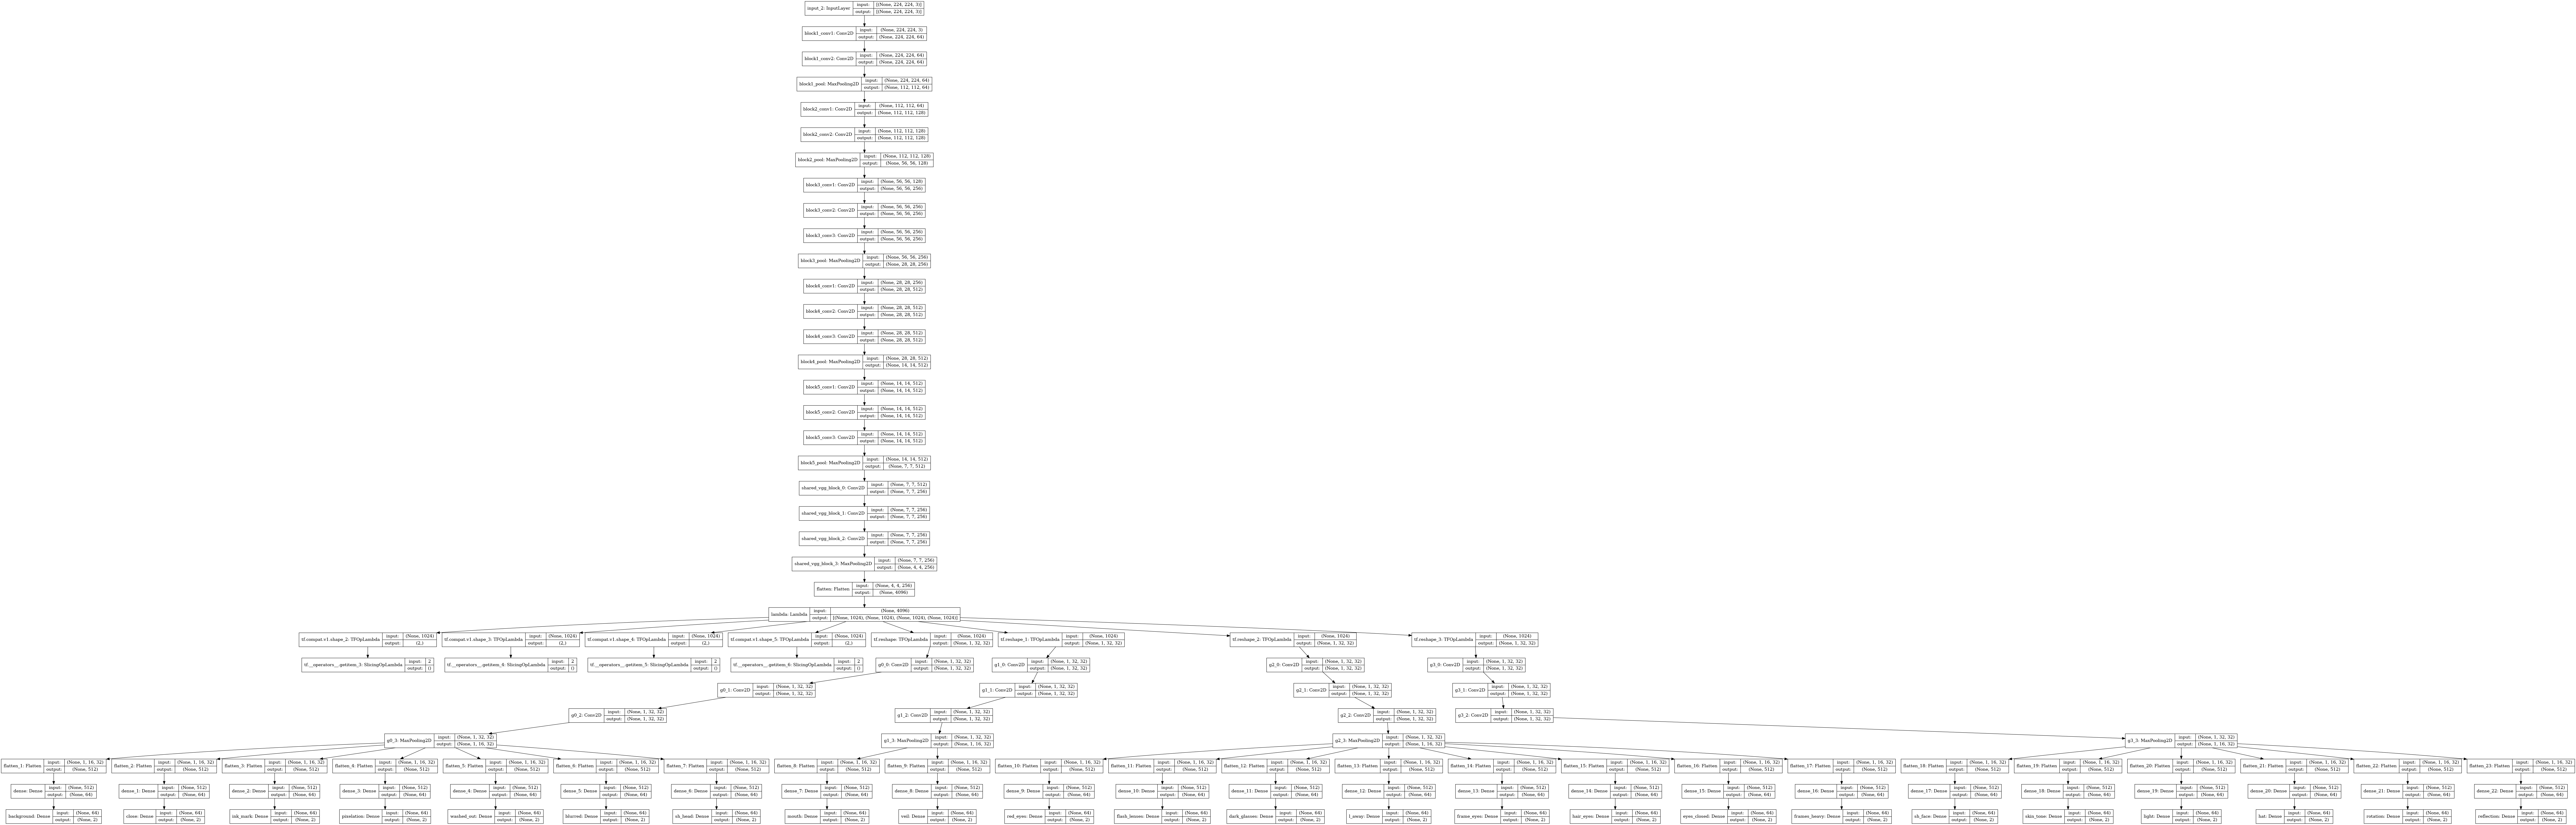

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

# Training Model

In [ ]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 17,943,854
  .. Trainable params: 3,229,166
  .. Non-trainable params: 14,714,688
Epoch 1/50


16/77 [=====>........................] - ETA: 4:05 - loss: 2.4631 - background_loss: 2.4300 - close_loss: 2.3937 - ink_mark_loss: 1.4332 - pixelation_loss: 1.0883 - washed_out_loss: 0.3956 - blurred_loss: 1.3340 - sh_head_loss: 1.2011 - mouth_loss: 0.1878 - veil_loss: 2.0935 - red_eyes_loss: 0.8083 - flash_lenses_loss: 0.7808 - dark_glasses_loss: 1.2930 - l_away_loss: 0.6655 - frame_eyes_loss: 1.6567 - hair_eyes_loss: 1.2871 - eyes_closed_loss: 0.9451 - frames_heavy_loss: 0.1915 - sh_face_loss: 0.7250 - skin_tone_loss: 0.2415 - light_loss: 0.5450 - hat_loss: 0.8699 - rotation_loss: 1.2694 - reflection_loss: 0.7945 - background_accuracy: 0.6787 - close_accuracy: 0.7373 - ink_mark_accuracy: 0.5859 - pixelation_accuracy: 0.7656 - washed_out_accuracy: 0.9893 - blurred_accuracy: 0.8174 - sh_head_accuracy: 0.8809 - mouth_accuracy: 0.9346 - veil_accuracy: 0.7168 - red_eyes_accuracy: 0.6602 - flash_lenses_accuracy: 0.8818 - dark_glasses_accuracy: 0.4639 - l_away_accuracy: 0.8682 - frame_eyes_a

# Plots

In [ ]:
runner.draw_training_history()

# Load Best Model

In [ ]:
runner.load_best_model()

# Saving Trained Model

In [ ]:
runner.save_model()

# Test Trained Model

## Validation Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()